## Итоговая работа по курсу "Математика для Data Science" потока mds-6

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

### **Задание 1**

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [5]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Найдём среднее значение выборки:

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

В **задании 1 a** нужно сравнивать косинусное расстояние (метрику) между пользователями.  
Это лучше сделать в виде цикла, сначала берём первого ('нулевого') пользователя, сравниваем с каждым из других пользователей и выбираем в пару пользователя с минимальным косинусным расстоянием к текущему пользователю. Итак, для каждого пользователя.

In [9]:
def cosine( a, b ):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )

In [11]:
pairs = []

for i in range(len(raitings)):
    user_raitings = raitings[i]
    cos_max = 0
    index = -1
    for j in range(len(raitings)):
        if j == i: continue
        if(cosine( user_raitings, raitings[j] ) > cos_max):
            cos_max = cosine( user_raitings, raitings[j] )
            index = j
    pairs.append([i, index])
print(pairs)

[[0, 8], [1, 4], [2, 9], [3, 9], [4, 8], [5, 9], [6, 3], [7, 5], [8, 0], [9, 2]]


In [8]:
raitings[2]

array([ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6])

В **задании 1 b** можно осуществить понижение размерности с помощью [svd-разложения](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).

In [29]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5)
X_reduced = svd.fit_transform(raitings)
X_reduced

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

Или так:

In [39]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

X = raitings
pca = PCA(n_components=5)
pca.fit(X)
X_reduced = np.dot(X, pca.components_.T)
X_original = np.dot(X_reduced, pca.components_)
X_reduced

array([[-14.42562294,   4.58656128,  -3.11511916,  -1.60103889,
         -3.15319867],
       [ -6.2381279 ,   5.37395842,   3.22380893,   2.96033849,
        -13.16140044],
       [-14.055866  ,  -4.03124884,   0.87237926,  -0.68735241,
         -9.34787025],
       [ -3.96636285,  -3.62291   ,  -2.84190447,  -3.21267898,
         -9.67288865],
       [-10.49064883,  10.20094268,   5.8262248 ,  -2.17451892,
         -8.82142702],
       [ -6.46234237,  -1.11339318,  10.40218859,  -5.76920221,
         -6.98415983],
       [ -0.50002249,   6.44339618,  -2.20932916,  -8.67874479,
        -11.7969803 ],
       [ -3.71917935,   1.64031623,   2.83244853,  -6.19804739,
         -2.10934215],
       [-14.90011072,   7.9559339 ,   0.33704499,  -8.01587444,
         -8.44505058],
       [-16.39933583,  -0.85992835,   2.85106876,  -9.65207068,
        -13.0894574 ]])

In [40]:
mean_squared_error(X, X_original) #true&pred

24.683375288903374

 Мы понижали размерность.  
 То, что оценки у нас "весьма поплыли" это не страшно, главное, что мы можем восстановить первоначальную информацию с некоторой точностью и есть возможность работы с матрицей меньшей размерности. 

### **Задание 2**

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

**Решение на python:**

In [66]:
#from scipy.misc import derivative
#from math import sin, cos

In [69]:
f_x = np.power(tan((sin(x)+cos(2*x+3))),2)
f_x

tan(sin(x) + cos(2*x + 3))**2

In [70]:
import sympy
from sympy import diff, symbols, cos, sin, tan #, symbols, lambdify
x = symbols('x')      #x, y = symbols('x y')
dfdx = diff(f_x)
dfdx

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [71]:
print(np.power(tan((sin(x)+cos(2*x+3))),2))

tan(sin(x) + cos(2*x + 3))**2


In [72]:
print(dfdx)

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))


In [73]:
lambdify((x), dfdx) (1)

55.385917635337854

**Решение в LaTeX:**

Для вычисления нам понадобится правила [вычисления производной](https://planetcalc.ru/675/).  
И [формулы тригонометрии](https://doza.pro/art/math/geometry/trig-formulas), чтобы привести один в один к полученному с помощью python выражению.

$f(x)=tan^2(sin(x)+cos(2x+3))$  

$$f'(x)=2{\cdot}tan(sin(x)+cos(2x+3)){\cdot}(tan(sin(x)+cos(2x+3)))'$$   
$$f'(x)=2{\cdot}tan(sin(x)+cos(2x+3)){\cdot}(tan(sin(x)+cos(2x+3)))'$$
$$f'(x)=2{\cdot}tan(sin(x)+cos(2x+3)){\cdot}(1+tan^2(sin(x)+cos(2x+3))){\cdot}(sin(x)+cos(2x+3))'$$  
$$f'(x)=2{\cdot}tan(sin(x)+cos(2x+3)){\cdot}(1+tan^2(sin(x)+cos(2x+3))){\cdot}(cos(x)-sin(2x+3){\cdot}(2x+3)')$$

Окончательно:  

$$f'(x)=2{\cdot}tan(sin(x)+cos(2x+3)){\cdot}(1+tan^2(sin(x)+cos(2x+3))){\cdot}(cos(x)-2{\cdot}sin(2x+3))$$

Можно ещё подставить единичку $x_0=1\ рад$.
$$f'(1)=2{\cdot}tan(sin(1)+cos(2{\cdot}1+3)){\cdot}(1+tan^2(sin(1)+cos(2{\cdot}1+3))){\cdot}(cos(1)-2{\cdot}sin(2{\cdot}1+3))$$

### **Задание 3**

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**

In [42]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [43]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [44]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

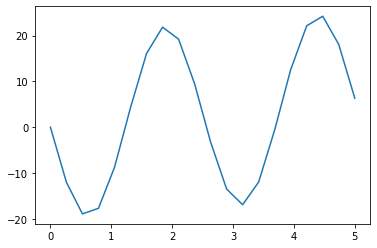

In [45]:
plt.plot(x, fx)
plt.show()

In [47]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [60]:
params0 = [2,-2]

res_error = minimize(error, params0, method='nelder-mead', options={'xtol': 1e-6, 'disp': True})

res_error

Optimization terminated successfully.
         Current function value: 0.000106
         Iterations: 57
         Function evaluations: 108


 final_simplex: (array([[ 3.00000022, -2.50000014],
       [ 3.00000019, -2.49999984],
       [ 2.99999923, -2.50000004]]), array([0.00010576, 0.0001236 , 0.00019454]))
           fun: 0.0001057634580963196
       message: 'Optimization terminated successfully.'
          nfev: 108
           nit: 57
        status: 0
       success: True
             x: array([ 3.00000022, -2.50000014])

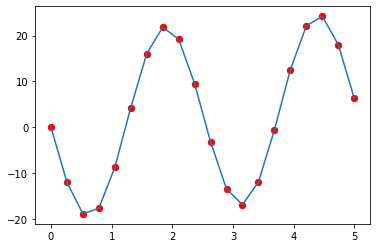

In [61]:
#plt.plot(x, fx)
plt.scatter(x, fx, color='red', s=40, marker='o')
plt.plot(x, f(x, 3, -2.5))
plt.show()

### **Задание 4**

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.



In [79]:
# создадим дискретную случайную велечину рэндомно
random_vars = np.random.random(20)
# создадим рэндомно плотности вероятностей значений с.в.
list_of_random_floats = np.random.random(20) 
probabilities = list_of_random_floats / list_of_random_floats.sum()

In [80]:
sum(probabilities)

0.9999999999999999

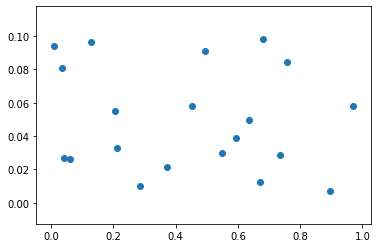

In [81]:
plt.scatter(random_vars, probabilities)
plt.show()

In [82]:
samples.mean()

0.5003861054868325

In [83]:
#параметры запуска: размеры выборок и количество повторов генерации
n1 = 50
samples_count = 1000

#массив для сохранения средних по выборкам
a1 = np.array([])

for number in range(samples_count):
    # на каждом цикле генерируем выборки размера n1
    sample1 = np.random.choice(random_vars, n1, p=probabilities)
    # считаем среднее по каждой выборке и добавляем в массив средних
    a1 = np.append(a1, sample1.mean())

Text(0.5, 0, '$x$')

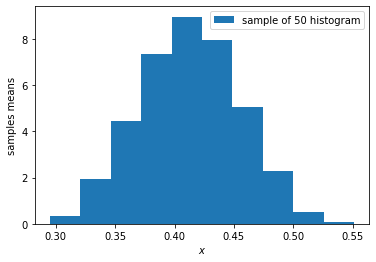

In [87]:
#строим график
label_1 = 'sample of ' + str(n1) + ' histogram'
plt.hist(a1, density=True, label=label_1)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')

In [85]:
a1

array([0.40051211, 0.48901364, 0.43531014, 0.42358905, 0.39547945,
       0.44659031, 0.37042574, 0.45404169, 0.44453351, 0.45912302,
       0.42672924, 0.36901795, 0.37614525, 0.41780612, 0.41520026,
       0.42709408, 0.37737144, 0.39609403, 0.37521276, 0.3750879 ,
       0.39161953, 0.34234626, 0.38700117, 0.428555  , 0.38888072,
       0.46445148, 0.42643055, 0.38154288, 0.43045655, 0.38378186,
       0.34445452, 0.41085231, 0.37397931, 0.44797814, 0.4339201 ,
       0.40567418, 0.34860581, 0.35815869, 0.46210409, 0.46451713,
       0.35797044, 0.36579919, 0.3859019 , 0.4728667 , 0.44586827,
       0.39259417, 0.45771555, 0.41175524, 0.42208912, 0.35915905,
       0.35135997, 0.34414462, 0.46440027, 0.42204331, 0.47001447,
       0.40105011, 0.46488275, 0.4477081 , 0.44273409, 0.42483859,
       0.43557162, 0.42752483, 0.34599218, 0.42289361, 0.42312053,
       0.41650267, 0.39291076, 0.38106842, 0.37798744, 0.42314436,
       0.41839998, 0.38131525, 0.41336892, 0.42826784, 0.43950

### **Задание 5**

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

[1, 1]]

**Решение на python:**

In [27]:
a = np.array([[1, 4],
              [1, 1]])
print(a)

[[1 4]
 [1 1]]


In [24]:
w, v = np.linalg.eig((a))
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]


[Как изобразить матрицу в LaTex](http://fkn.ktu10.com/?q=node/6643)  
[Как изобразить систему уравнений в фигурных скобка в LaTex](http://fkn.ktu10.com/?q=node/5603)

**Решение в LaTeX:**

Дана матрица $a =\begin{pmatrix}
  1& 4\\
  1& 1
\end{pmatrix}.$  

Характеристическое уравнение имеет вид:  
$\begin{vmatrix}
  1-w& 4\\
  1& 1-w
\end{vmatrix}=0.$  


Решение характеристического уравнения сводится к поиску корней квадратного уравнения вида:
$w^2-2w-3=0.$  

По теореме Виета:  
\begin{equation*}
 \begin{cases}
   w_1+w_2=2, 
   \\
   w_1{\cdot}w_2=-3.
 \end{cases}
\end{equation*}

Следовательно, видно, что наши собственные вектора принимают значения:  
$w_1=3,$  
$w_2=-1.$  

Подставим поочерёдно полученные собственные значения в характеристическое уравнение и получим пару систем уравнений.

Случай №1.  

$w_1=3$  

Тогда из характеристического уравнения получим:  

$\begin{equation*}
 \begin{cases}
   -2x+4y=0, 
   \\
   x-2y=0.
 \end{cases}
\end{equation*}$

В результате получаем линейную зависимость $x=2y.$  

Откуда собственный вектор (фактически, направление):

$w_1=\begin{pmatrix}
  2\\
  1
\end{pmatrix}.$

Решение совпадает с полученным ранее с помощью кода до множителя, точнее сказать, что мы здесь показали не нормированный вектор направления, а "приятный взору".

Случай №2.  

$w_2=-1$  

Тогда из характеристического уравнения получим:  

$\begin{equation*}
 \begin{cases}
   2x+4y=0, 
   \\
   x+2y=0.
 \end{cases}
\end{equation*}$

В результате получаем линейную зависимость $x=-2y.$  

Откуда собственный вектор (фактически, направление):

$w_2=\begin{pmatrix}
  -2\\
  1
\end{pmatrix}.$

Решение совпадает с полученным ранее с помощью кода до множителя, точнее сказать, что мы здесь показали не нормированный вектор направления, а "приятный взору".